In [1]:
import numpy as np
from scipy.special import beta
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
def pdf(k, p):
	assert k >= 0 and k <= 4, "outside of pdf domain!"
	return ((k/4)*(1-k/4))**((p-3)/2) / (4 * beta((p-1)/2,(p-1)/2)) 

def vpdf(x, mu, kappa):
	C = kappa / ((4*np.pi) * (1-np.exp(-2*kappa)))
	return (np.exp(kappa*(np.dot(x,mu))) + np.exp(-kappa*(np.dot(x,mu)))) * C

def vpdf_dot(d, kappa):
	C = kappa / ((4*np.pi) * (1-np.exp(-2*kappa)))
	return (np.exp(kappa * d) + np.exp(-kappa * d))* C	

### fig 3a

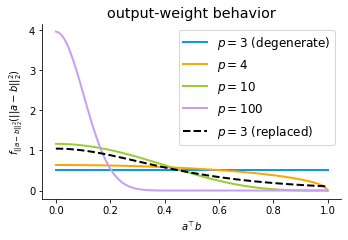

In [3]:
fig, ax = plt.subplots(1,1,figsize=(5,3.5))
plt.rc('font', size=12)

ax.plot(np.linspace(0,1,100), [2*pdf(2-2*x, 3) for x in np.linspace(0,1,100)], label=r'$p=3$ (degenerate)',linewidth=2, c='#069AF3')
ax.plot(np.linspace(0,1,100), [2*pdf(2-2*x, 4) for x in np.linspace(0,1,100)], label=r'$p=4$',linewidth=2, c='orange')
ax.plot(np.linspace(0,1,100), [2*pdf(2-2*x, 10) for x in np.linspace(0,1,100)], label=r'$p=10$',linewidth=2, c='#9ACD32')
ax.plot(np.linspace(0,1,100), [2*pdf(2-2*x, 100) for x in np.linspace(0,1,100)], label=r'$p=100$',linewidth=2, c='#C79FEF')
ax.plot(np.linspace(0,1,100), [0.5/vpdf_dot(x, 3) for x in np.linspace(0,1,100)], label=r'$p=3$ (replaced)', linestyle='--', c='k', linewidth=2)

plt.yticks([0,1,2,3,4])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.legend()
plt.title('output-weight behavior');
plt.xlabel(r'$a^\top b$');
plt.ylabel(r'$f_{||a-b||_2^2}(||a-b||_2^2)$');

plt.tight_layout()
# plt.savefig('fig/fig3a.pdf')

### fig3b

<ipython-input-12-f9a6b96a0477>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
<ipython-input-12-f9a6b96a0477>:28: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
<ipython-input-12-f9a6b96a0477>:28: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


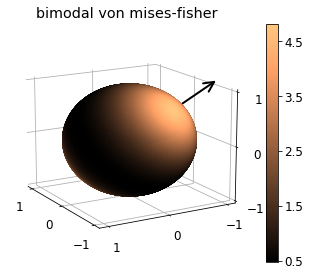

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.rc('font', size=12)

# draw sphere
u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:200j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

b = [-2/3,-1/3,2/3]
cmap = plt.cm.copper
color = np.array([vpdf([x.flatten()[i], y.flatten()[i], z.flatten()[i]], b, 3) for i in range(len(x.flatten()))]).reshape(x.shape)
scamap = plt.cm.ScalarMappable(cmap=cmap)
fcolors = scamap.to_rgba(color)

ax.plot_surface(x, y, z, cstride=1, rstride=1, facecolors=fcolors, cmap=cmap, alpha=1)
from matplotlib.patches import FancyArrowPatch

from mpl_toolkits.mplot3d import proj3d
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

arw = Arrow3D([b[0],b[0]*2], [b[1],b[1]*2], [b[2],b[2]*2], arrowstyle='->', color='black', lw=2, mutation_scale=25)
ax.add_artist(arw)
# ax.text(2/(3),-1/(3),2/(3), 'b')

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-1,0,1])

ax.view_init(15,150)
# plt.draw()
# plt.pause(.001)

# ax.grid(False)

fig.colorbar(scamap, ticks=[0.5,1.5,2.5,3.5,4.5])
plt.title('bimodal von mises-fisher')

plt.tight_layout()

# plt.savefig('fig/ball.pdf')
# plt.xaxis("off")

### $p(\|b-a^*\|_2)$ where $b\sim unif(S^p(1))$

Text(0.5, 1.0, 'p=10')

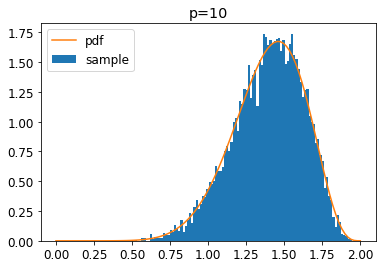

In [4]:
# validate analytical form
p = 10

def pdf(k, p):
	assert k >= 0 and k <= 2, "outside of pdf domain!"
	return ((k**2/4)*(1-k**2/4))**((p-3)/2) * k / (2 * beta((p-1)/2,(p-1)/2)) 

def sample_spherical(npoints, ndim=p):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

X = sample_spherical(10000)

a = np.zeros(p)
a[0] = 1

plt.hist(np.linalg.norm(X.T-a, axis=1), bins=100, density=True, label='sample');
plt.plot(np.linspace(0,2,100), [pdf(x, p) for x in np.linspace(0,2,100)], label='pdf')

plt.legend()
plt.title(f'p={p}')

<ipython-input-4-7142487c0625>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return ((k**2/4)*(1-k**2/4))**((p-3)/2) * k / (2 * beta((p-1)/2,(p-1)/2))
<ipython-input-4-7142487c0625>:6: RuntimeWarning: invalid value encountered in double_scalars
  return ((k**2/4)*(1-k**2/4))**((p-3)/2) * k / (2 * beta((p-1)/2,(p-1)/2))


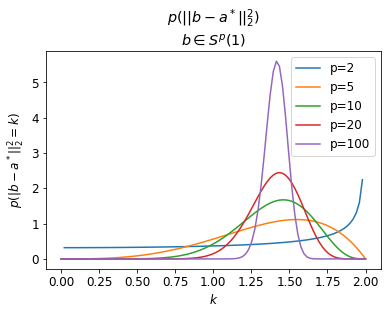

In [5]:
for p in [2,5,10,20,100]:
	plt.plot(np.linspace(0,2,100), [pdf(x, p) for x in np.linspace(0,2,100)], label=f'p={p}')
plt.legend()
plt.title(r'$p(||b-a^*||_2^2)$'+'\n'+r'$b\in S^p(1)$');
plt.xlabel(r'$k$');
plt.ylabel(r'$p(|b-a^*||_2^2=k)$');


<ipython-input-4-7142487c0625>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return ((k**2/4)*(1-k**2/4))**((p-3)/2) * k / (2 * beta((p-1)/2,(p-1)/2))
<ipython-input-4-7142487c0625>:6: RuntimeWarning: invalid value encountered in double_scalars
  return ((k**2/4)*(1-k**2/4))**((p-3)/2) * k / (2 * beta((p-1)/2,(p-1)/2))


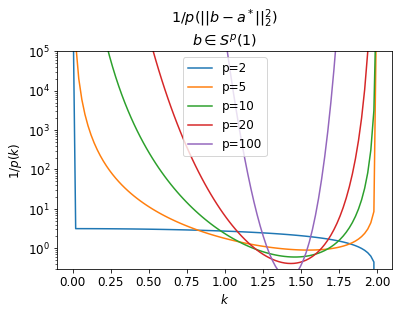

In [6]:
plt.yscale('log')
plt.ylim(0.3, 10**5)
for p in [2,5,10,20,100]:
	plt.plot(np.linspace(0,2,100), [1 / max(0.0000001,(pdf(x, p))) for x in np.linspace(0,2,100)], label=f'p={p}')
plt.legend()
plt.title(r'$1/p(||b-a^*||_2^2)$'+'\n'+r'$b\in S^p(1)$');
plt.xlabel(r'$k$');
plt.ylabel(r'$1/p(k)$');


### $p(\|b-a^*\|^2)$ where $b\sim unif(S^p(1))$

- $a\in S^p(1)$

Text(0.5, 1.0, 'p=10')

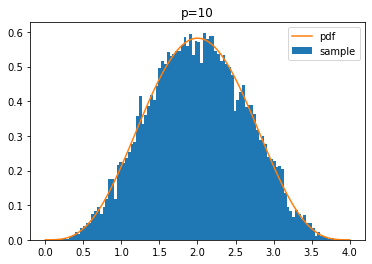

In [7]:
# validate analytical form
p = 10

def pdf(k, p):
	assert k >= 0 and k <= 4, "outside of pdf domain!"
	return ((k/4)*(1-k/4))**((p-3)/2) / (4 * beta((p-1)/2,(p-1)/2)) 

def sample_spherical(npoints, ndim=p):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

X = sample_spherical(10000)

a = np.zeros(p)
a[0] = 1

plt.hist(np.linalg.norm(X.T-a, axis=1)**2, bins=100, density=True, label='sample');
plt.plot(np.linspace(0,4,100), [pdf(x, p) for x in np.linspace(0,4,100)], label='pdf')

plt.legend()
plt.title(f'p={p}')

<ipython-input-2-e0940f37d861>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return ((k/4)*(1-k/4))**((p-3)/2) / (4 * beta((p-1)/2,(p-1)/2))


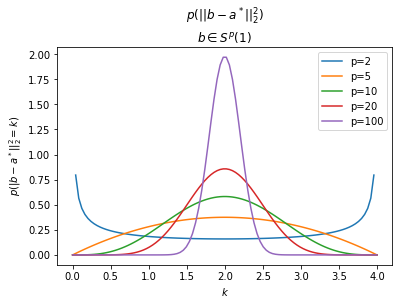

In [3]:
for p in [2,5,10,20,100]:
	plt.plot(np.linspace(0,4,100), [pdf(x, p) for x in np.linspace(0,4,100)], label=f'p={p}')
plt.legend()
plt.title(r'$p(||b-a^*||_2^2)$'+'\n'+r'$b\in S^p(1)$');
plt.xlabel(r'$k$');
plt.ylabel(r'$p(|b-a^*||_2^2=k)$');


<ipython-input-2-e0940f37d861>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return ((k/4)*(1-k/4))**((p-3)/2) / (4 * beta((p-1)/2,(p-1)/2))


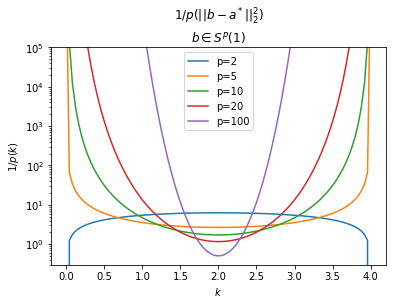

In [4]:
plt.yscale('log')
plt.ylim(0.3, 10**5)
for p in [2,5,10,20,100]:
	plt.plot(np.linspace(0,4,100), [1 / max(0.0000001,(pdf(x, p))) for x in np.linspace(0,4,100)], label=f'p={p}')
plt.legend()
plt.title(r'$1/p(||b-a^*||_2^2)$'+'\n'+r'$b\in S^p(1)$');
plt.xlabel(r'$k$');
plt.ylabel(r'$1/p(k)$');


- $a\in S^p(r)$ where $r\approx 1$

Text(0.5, 1.0, 'p=10\n r=0.5')

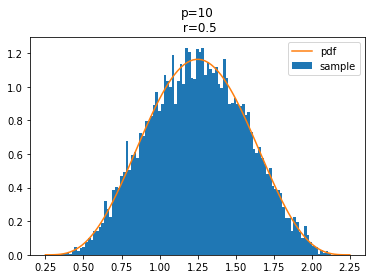

In [5]:
# validate analytical form
p = 10
r = .5

def pdf(k, p, r):
	assert k >= (1-r)**2 and k <= (1+r)**2, "outside of pdf domain!"
	assert r >=0, 'radius of a^star can not be negative!'
	return (((k - (1-r)**2)/(4*r))*(1 - (k - (1-r)**2)/(4*r)))**((p-3)/2) / (4 * r * beta((p-1)/2,(p-1)/2)) 

def sample_spherical(npoints, ndim=p):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

X = sample_spherical(10000)

a = np.zeros(p)
a[0] = r

plt.hist(np.linalg.norm(X.T-a, axis=1)**2, bins=100, density=True, label='sample');
plt.plot(np.linspace((1-r)**2,(1+r)**2,100), [pdf(x, p, r) for x in np.linspace((1-r)**2,(1+r)**2,100)], label='pdf')

plt.legend()
plt.title(f'p={p}\n r={r}')

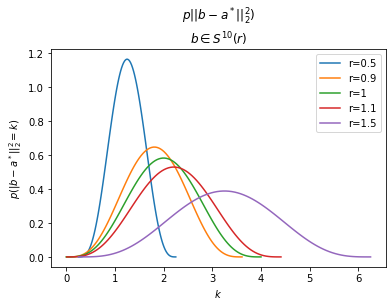

In [6]:
p = 10
for r in [0.5, 0.9, 1, 1.1, 1.5]:
	plt.plot(np.linspace((1-r)**2,(1+r)**2,100), [pdf(x, p, r) for x in np.linspace((1-r)**2,(1+r)**2,100)], label=f'r={r}')
	# plt.vlines([(1-r)**2, (1+r)**2], 0,1.2, linestyles=':', colors='grey')
plt.legend()
plt.title(r'$p||b-a^*||_2^2)$'+'\n'+r'$b\in S^{10}(r)$');
plt.xlabel(r'$k$');
plt.ylabel(r'$p(|b-a^*||_2^2=k)$');


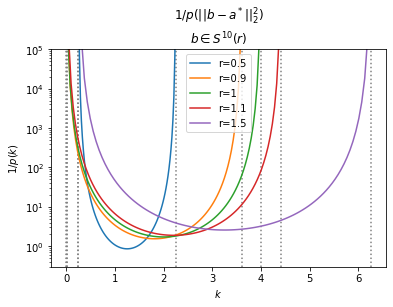

In [7]:
plt.yscale('log')
plt.ylim(0.3, 10**5)
for r in [0.5, 0.9, 1, 1.1, 1.5]:
	plt.plot(np.linspace((1-r)**2,(1+r)**2,100), [1 / max(0.0000001,(pdf(x, p, r))) for x in np.linspace((1-r)**2,(1+r)**2,100)], label=f'r={r}')
	plt.vlines([(1-r)**2, (1+r)**2], 0.3, 10**5, linestyles=':', colors='grey')
plt.legend()
plt.title(r'$1/p(||b-a^*||_2^2)$'+'\n'+r'$b\in S^{10}(r)$');
plt.xlabel(r'$k$');
plt.ylabel(r'$1/p(k)$');


### $p(b_1)$

In [6]:
# validate analytical form
p = 20

def pdf(k, p):
	assert k >= -1 and k <= 1, "outside of pdf domain!"
	return ((1-k**2)/4)**((p-3)/2) / (2 * beta((p-1)/2,(p-1)/2)) 

X = sample_spherical(100000,ndim=p)

plt.hist(X.T[:,0], bins=100, density=True, label='sample');
plt.plot(np.linspace(-1,1,100), [pdf(x, p) for x in np.linspace(-1,1,100)], label='pdf')

plt.legend()
plt.title(f'p={p}')

NameError: name 'sample_spherical' is not defined

### coordinate-wise ratio collapsing to ratio of weights

In [8]:
def f(a, dim, p):
	X = sample_spherical(1000000, ndim=p)
	k = np.linalg.norm(X.T-a, axis=1)**2
	w = (k * (1 - k/4))**((3-p)/2)
	k_dim = (X.T-a)[:,dim]**2
	return np.dot(w, k_dim)

def g(a, dim, p):
	X = sample_spherical(1000000, ndim=p-1) * ((1-a[dim]**2)**0.5) 
	k = (1-a[dim]**2) - X.T[:, 0] * ((1-a[dim]**2)**0.5) 
	w = (k * (2-k))**((3-p)/2)
	# return (abs(a[dim])*((1-a[dim]**2)**1.5)) * w.sum()
	return (abs(a[dim])**2) * w.sum() 

In [62]:
p = 15

a = np.random.uniform(0,1,p)
a = a / np.linalg.norm(a)

In [63]:
F = []

for i in range(p):
	F.append(f(a, i, p))

F = np.array(F) / np.sum(F)

In [55]:
G = []

for i in range(p):
	G.append(g(a, i, p))

G = np.array(G) / np.sum(G)

Text(0.5, 1.0, 'pearsonr=0.95')

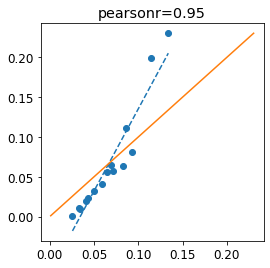

In [56]:
plt.figure(figsize=(4,4))
plt.scatter(F, G)
plt.plot(np.unique(F), np.poly1d(np.polyfit(F, G, 1))(np.unique(F)), '--')
plt.plot([min(list(F)+list(G)), max(list(F)+list(G))], [min(list(F)+list(G)), max(list(F)+list(G))])
plt.title('pearsonr={:.2f}'.format(pearsonr(F,G)[0]))

In [57]:
# np.polyfit(F, G, 1)

In [64]:
def h(a, dim, p):
	return a[dim]**2 * ((1 - a[dim]**2)**((4-p)/2))
	# return a[dim]**2	

In [65]:
H = []

for i in range(p):
	H.append(h(a, i, p))

H = np.array(H) / np.sum(H)
# H = (H + 1/(2*p)) / np.sum(H + (1/(2*p)))

Text(0.5, 1.0, 'pearsonr=0.97')

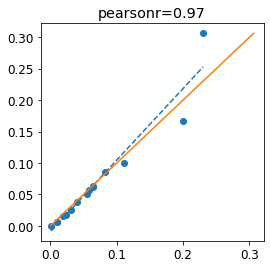

In [60]:
plt.figure(figsize=(4,4))
plt.scatter(G, H)
plt.plot(np.unique(G), np.poly1d(np.polyfit(G, H, 1))(np.unique(G)), '--')
plt.plot([min(list(G)+list(H)), max(list(G)+list(H))], [min(list(G)+list(H)), max(list(G)+list(H))])
plt.title('pearsonr={:.2f}'.format(pearsonr(G,H)[0]))


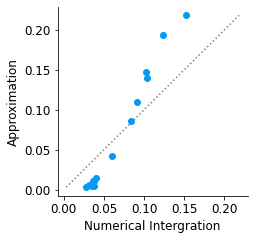

In [66]:
fig, ax = plt.subplots(1,1,figsize=(3.7,3.5))
plt.rc('font', size=12)


plt.scatter(F, H, color='#069AF3')
# plt.plot(np.unique(F), np.poly1d(np.polyfit(F, H, 1))(np.unique(F)), '--')
plt.plot([min(list(F)+list(H)), max(list(F)+list(H))], [min(list(F)+list(H)), max(list(F)+list(H))], linestyle=':', color='grey')
# plt.title('pearsonr={:.2f}'.format(pearsonr(F,H)[0]))

plt.xlabel('Numerical Intergration')
plt.ylabel('Approximation')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.savefig('fig/approx1.pdf')
